#Mohamed Lasheen

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv("/content/sample_data/Student Scores.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


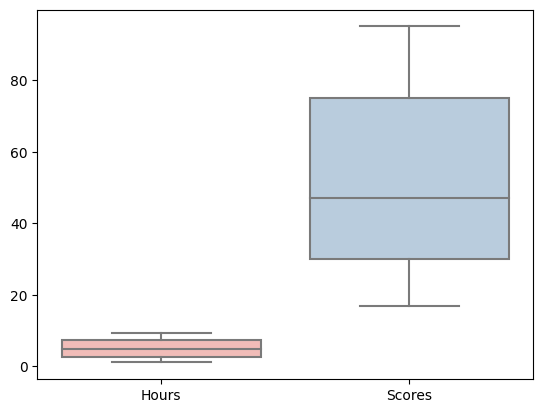

In [ ]:
ax = sns.boxplot(df, palette='Pastel1')

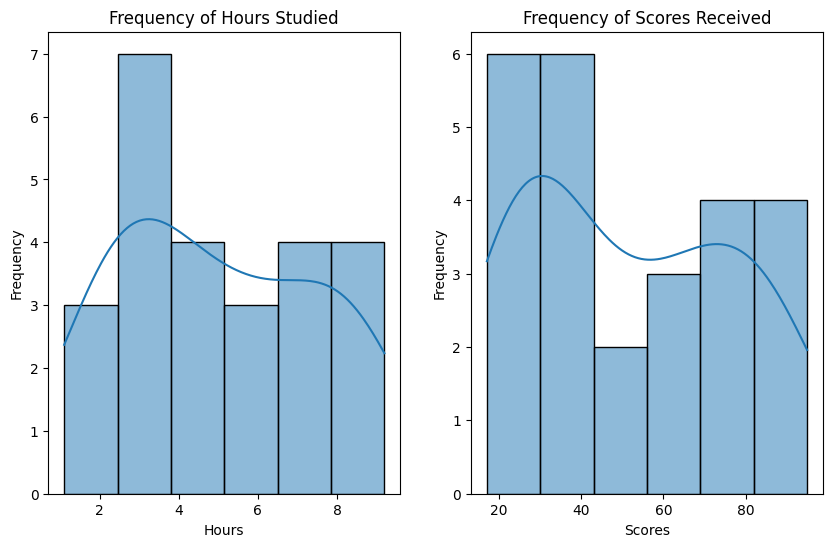

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax = sns.histplot(ax=ax1, data=df, x='Hours', kde=True)
ax = sns.histplot(ax=ax2, data=df, x='Scores', kde=True)
txt = ax1.set_ylabel("Frequency")
txt = ax2.set_ylabel("Frequency")
txt = ax1.set_title("Frequency of Hours Studied")
txt = ax2.set_title("Frequency of Scores Received")

In [ ]:
px.scatter(df, x='Hours', y='Scores', title="Scatter plot", size='Scores')

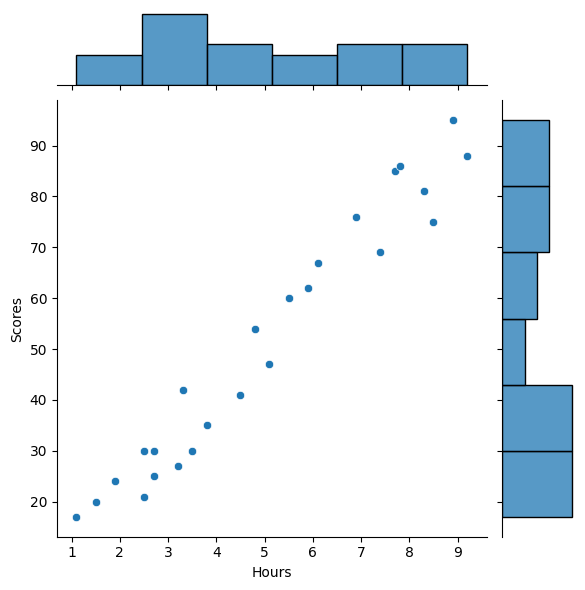

In [ ]:
# To compare frequency of hours and scores against the scattered data points
ax = sns.jointplot(data=df, x="Hours", y="Scores")

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


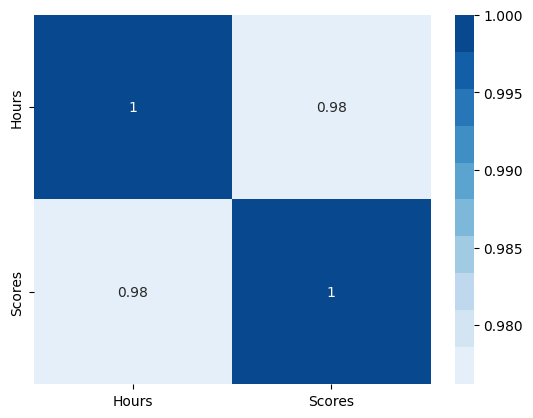

In [ ]:
print(df.corr())
ax = sns.heatmap(df.corr(), cmap=sns.color_palette("Blues", 10), annot=True)

In [ ]:
x = np.array(df['Hours']).reshape(-1, 1)
y = np.array(df['Scores']).reshape(-1, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

#Regression Models

Linear Regression Model

In [ ]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
y_prediction = reg_model.predict(x_test)
test_pred = np.column_stack((y_test, y_prediction))
print(f"Accuracy in train: {reg_model.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {reg_model.score(x_test, y_test)*100:.2f}")
print(f"Test and prediction:\n{test_pred}\n")

Accuracy in train: 94.93
Accuracy in test: 96.86
Test and prediction:
[[81.         83.33366331]
 [30.         27.09319812]
 [21.         27.09319812]
 [76.         69.75837861]]



Decision Tree Regression Model

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train.ravel())
y_prediction = dt_model.predict(x_test)
test_pred = np.column_stack((y_test, y_prediction))
print(f"Accuracy in train: {dt_model.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {dt_model.score(x_test, y_test)*100:.2f}")
print(f"Test and prediction:\n{test_pred}\n")

Accuracy in train: 99.90
Accuracy in test: 95.34
Test and prediction:
[[81.  75. ]
 [30.  27.5]
 [21.  27.5]
 [76.  69. ]]



Random Forest Regression Model

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train.ravel())
y_prediction = rf_model.predict(x_test)
test_pred = np.column_stack((y_test, y_prediction))
print(f"Accuracy in train: {rf_model.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {rf_model.score(x_test, y_test)*100:.2f}")
print(f"Test and prediction:\n{test_pred}\n")

Accuracy in train: 98.40
Accuracy in test: 97.92
Test and prediction:
[[81.     79.35  ]
 [30.     27.7275]
 [21.     27.7275]
 [76.     73.45  ]]



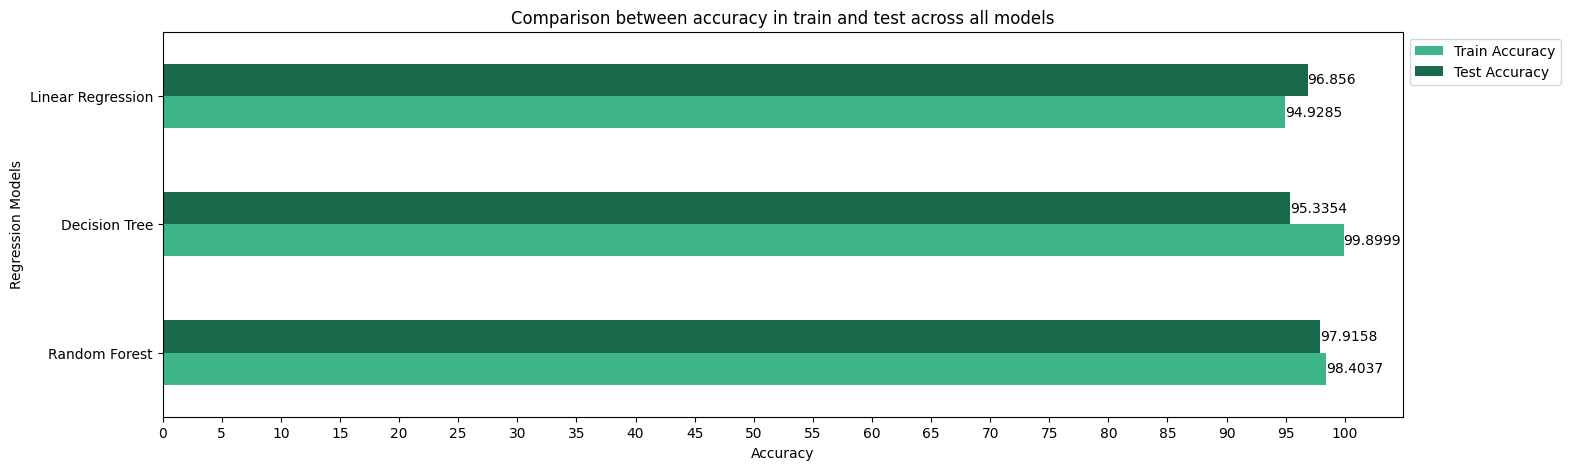

In [ ]:
models_df = pd.DataFrame({'regression_models': ['Linear Regression', 'Decision Tree', 'Random Forest'],
                   'train_accuracy': [reg_model.score(x_train, y_train) * 100,
                                      dt_model.score(x_train, y_train) * 100,
                                      rf_model.score(x_train, y_train) * 100],
                   'test_accuracy':[reg_model.score(x_test, y_test) * 100,
                                    dt_model.score(x_test, y_test) * 100,
                                    rf_model.score(x_test, y_test) * 100]})
models_df['accuracy_average'] = (models_df['train_accuracy'] + models_df['test_accuracy']) / 2
fig, ax = plt.subplots(figsize=(16, 5))
ax = models_df.sort_values(by='accuracy_average', ascending=False).plot.barh(ax=ax, x='regression_models',
                                                                             y=['train_accuracy', 'test_accuracy'],
                                                                             color=['#3EB489','#19694B'])
txt1 = ax.legend(bbox_to_anchor=(1.0, 1.0), labels= ['Train Accuracy', 'Test Accuracy'])
txt2 = ax.set_title("Comparison between accuracy in train and test across all models")
txt3 = ax.set_ylabel("Regression Models")
txt4 = ax.set_xlabel("Accuracy")
txt5 = ax.set_xticks(range(0, 101, 5))
for bar in ax.containers:
  ax.bar_label(bar)